Distance to the particle horizon
Distance to the event horizon
Distance to the Hubble sphere (where vrecession = c)


In [1]:
# First let's set up our packages
import numpy as np
from matplotlib import pyplot as plt
from scipy import integrate

# And set some constants
c = 299792.458 # km/s (speed of light)

H0kmsmpc = 70.  # Hubble constant in km/s/Mpc
H0s = H0kmsmpc * 3.2408e-20 # H0 in inverse seconds is H0 in km/s/Mpc * (3.2408e-20 Mpc/km)
H0y = H0s * 3.154e7 * 1.e9 # H0 in inverse Giga years is H0 in inverse seconds * (3.154e7 seconds/year) * (1e9 years / Giga year)
print('Hubble time = ',1/H0y,'Gyr')

cH0mpc = c/H0kmsmpc   # c/H0 in Mpc  (the km/s cancel out in the numerator and denominator)  - Hubble length c/H0
cH0Glyr = cH0mpc * 3.262 / 1000 #c/H0 in billions of light years.  There are 3.262 light year / parsec

Hubble time =  13.976165695516954 Gyr


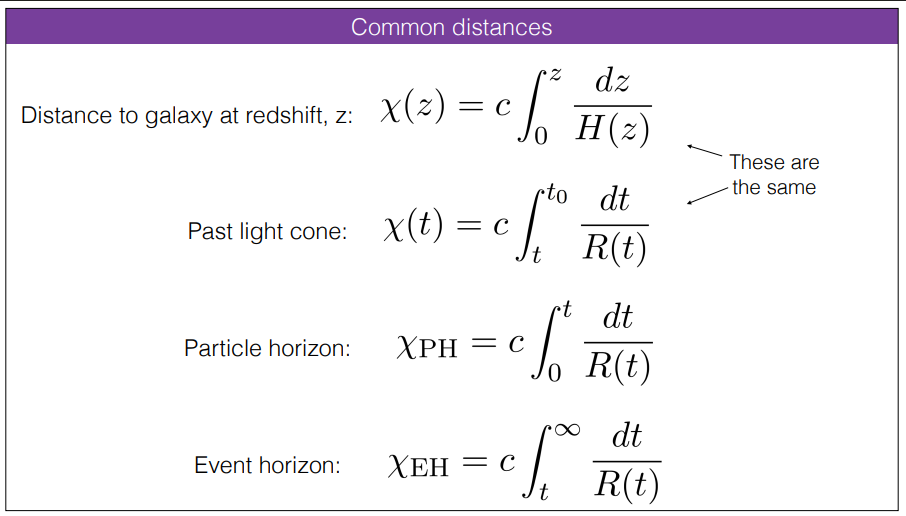

Distance to the particle horizon

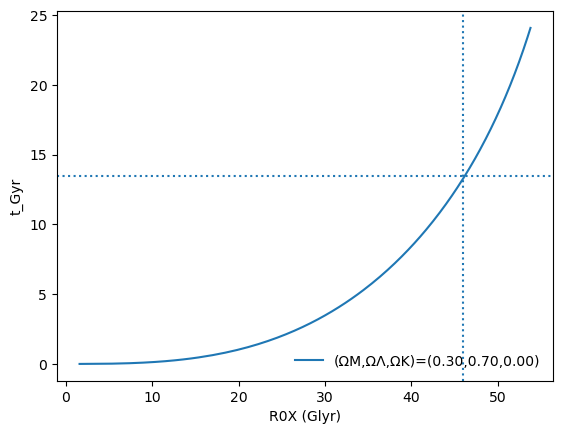

In [2]:
om = 0.3  # Matter
ol = 0.7  # Lambda
ok = 1-om-ol  # curvature
a_arr = np.arange(0.001,2,0.01)

def adot_a_inv(a,om,ol,ok):                         # 1/(adot *a)   the integrand of EQN 23   
    adot_a_inv = (a**2)*(np.sqrt((om * a**(-3)) + (ok * a**(-2)) + ol)) 
    return 1.0/adot_a_inv

R0X = []    # Define an empty list to store age_Gyr values
for a in a_arr:
    xx = integrate.quad(adot_a_inv, 0, a, args=(om,ol,ok))  # RHS = RHS of EQN (8)* H_0   Note: integral limits in green, they are between what values of a you want to know the time for
    R0X.append(xx[0] * cH0Glyr)


def adot(a,om,ol,ok):                         # 1/(adot)   the integrand of EQN 24  
    adot = (a)*(np.sqrt((om * a**(-3)) + (ok * a**(-2)) + ol))  
    return 1.0/adot

t_Gyr = []    # Define an empty list to store t_Gyr values - this is the age at a in a_arr
for a in a_arr:
    yy = integrate.quad(adot, 0, a, args=(om,ol,ok))  # RHS = RHS of EQN (8)* H_0   Note: integral limits in green, they are between what values of a you want to know the time for
    t_Gyr.append(yy[0] / H0y)



plt.plot(R0X,t_Gyr,label='(ΩM,ΩΛ,ΩK)=(%.2f,%.2f,%.2f)'%(om,ol,ok))
plt.axvline(x=46,linestyle=':') # Plot some crosshairs 
plt.axhline(y=13.47,linestyle=':')
plt.xlabel('R0X (Glyr)')
plt.ylabel('t_Gyr')
plt.legend(loc='lower right',frameon=False)
plt.show()

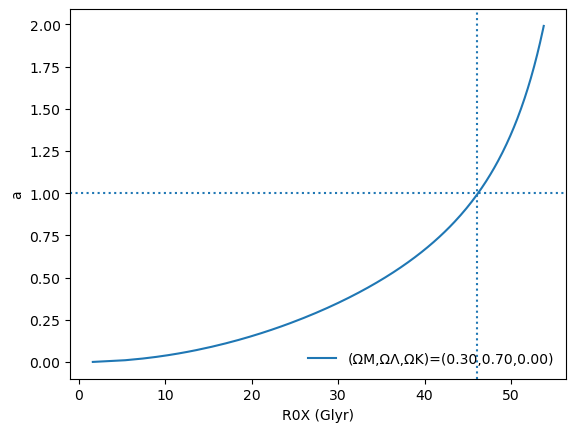

In [3]:
om = 0.3  # Matter
ol = 0.7  # Lambda
ok = 1-om-ol  # curvature
a_arr = np.arange(0.001,2,0.01)

def adot_a_inv(a,om,ol,ok):                         # 1/(adot *a)   the integrand of EQN 23   
    adot_a_inv = (a**2)*(np.sqrt((om * a**(-3)) + (ok * a**(-2)) + ol)) 
    return 1.0/adot_a_inv

R0X = []    # Define an empty list to store age_Gyr values
for a in a_arr:
    xx = integrate.quad(adot_a_inv, 0, a, args=(om,ol,ok))  # RHS = RHS of EQN (8)* H_0   Note: integral limits in green, they are between what values of a you want to know the time for
    R0X.append(xx[0] * cH0Glyr)


def adot(a,om,ol,ok):                         # 1/(adot)   the integrand of EQN 24  
    adot = (a)*(np.sqrt((om * a**(-3)) + (ok * a**(-2)) + ol))  
    return 1.0/adot

t_Gyr = []    # Define an empty list to store t_Gyr values - this is the age at a in a_arr
for a in a_arr:
    yy = integrate.quad(adot, 0, a, args=(om,ol,ok))  # RHS = RHS of EQN (8)* H_0   Note: integral limits in green, they are between what values of a you want to know the time for
    t_Gyr.append(yy[0] / H0y)



plt.plot(R0X,a_arr,label='(ΩM,ΩΛ,ΩK)=(%.2f,%.2f,%.2f)'%(om,ol,ok))
plt.axvline(x=46,linestyle=':') # Plot some crosshairs 
plt.axhline(y=1,linestyle=':')
plt.xlabel('R0X (Glyr)')
plt.ylabel('a')
plt.legend(loc='lower right',frameon=False)
plt.show()

past light cone

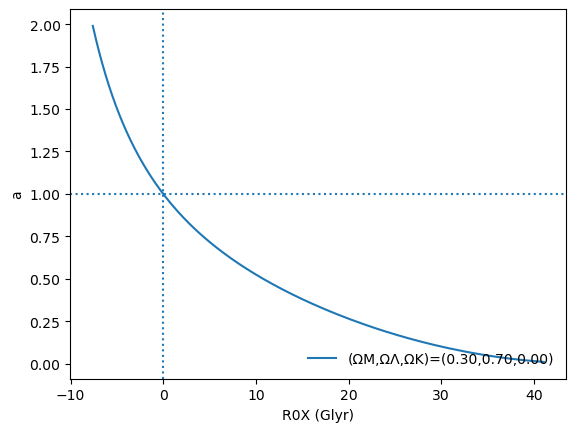

13.474412704738654


In [6]:
om = 0.3  # Matter
ol = 0.7  # Lambda
ok = 1-om-ol  # curvature
a_arr = np.arange(0.01,2,0.01)

def adot_a_inv(a,om,ol,ok):                         # 1/(adot *a)   the integrand of EQN 23   
    adot_a_inv = (a**2)*(np.sqrt((om * a**(-3)) + (ok * a**(-2)) + ol)) 
    return 1.0/adot_a_inv

R0X = []    # Define an empty list to store age_Gyr values
for a in a_arr:
    xx = integrate.quad(adot_a_inv, a, 1, args=(om,ol,ok))  # RHS = RHS of EQN (8)* H_0   Note: integral limits in green, they are between what values of a you want to know the time for
    R0X.append(xx[0] * cH0Glyr)



plt.plot(R0X,a_arr,label='(ΩM,ΩΛ,ΩK)=(%.2f,%.2f,%.2f)'%(om,ol,ok))
plt.axvline(x=0,linestyle=':') # Plot some crosshairs 
plt.axhline(y=1,linestyle=':')
plt.xlabel('R0X (Glyr)')
plt.ylabel('a')
plt.legend(loc='lower right',frameon=False)
plt.show()


yy = integrate.quad(adot, 0, 1, args=(om,ol,ok))  # RHS = RHS of EQN (8)* H_0   Note: integral limits in green, they are between what values of a you want to know the time for
t_Gyr=(yy[0] / H0y)
print(t_Gyr)

EVENT Horizon

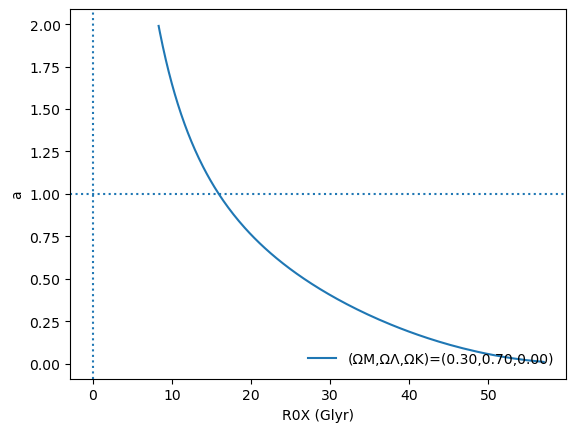

13.474412704738654


In [8]:
om = 0.3  # Matter
ol = 0.7  # Lambda
ok = 1-om-ol  # curvature
a_arr = np.arange(0.01,2,0.01)

def adot_a_inv(a,om,ol,ok):                         # 1/(adot *a)   the integrand of EQN 23   
    adot_a_inv = (a**2)*(np.sqrt((om * a**(-3)) + (ok * a**(-2)) + ol)) 
    return 1.0/adot_a_inv

R0X = []    # Define an empty list to store age_Gyr values
for a in a_arr:
    xx = integrate.quad(adot_a_inv, a, 1000, args=(om,ol,ok))  # RHS = RHS of EQN (8)* H_0   Note: integral limits in green, they are between what values of a you want to know the time for
    R0X.append(xx[0] * cH0Glyr)



plt.plot(R0X,a_arr,label='(ΩM,ΩΛ,ΩK)=(%.2f,%.2f,%.2f)'%(om,ol,ok))
plt.axvline(x=0,linestyle=':') # Plot some crosshairs 
plt.axhline(y=1,linestyle=':')
plt.xlabel('R0X (Glyr)')
plt.ylabel('a')
plt.legend(loc='lower right',frameon=False)
plt.show()


yy = integrate.quad(adot, 0, 1, args=(om,ol,ok))  # RHS = RHS of EQN (8)* H_0   Note: integral limits in green, they are between what values of a you want to know the time for
t_Gyr=(yy[0] / H0y)
print(t_Gyr)

In [ ]:
different cosmology paremters


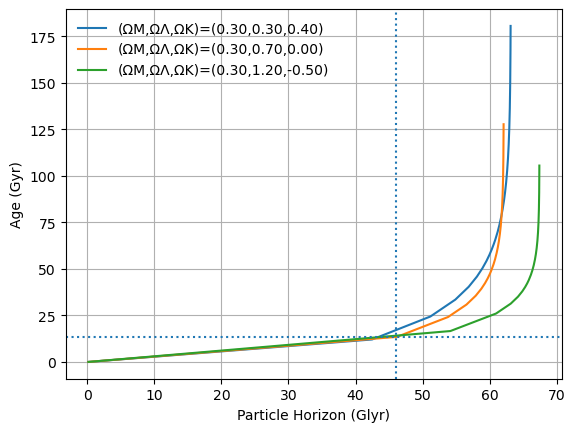

In [35]:
om = 0.3  # Matter
ol_arr = (0.3,0.7,1.2)  # Lambda

a_arr = np.arange(0.00001,1000,1)

def adot_a_inv(a,om,ol,ok):                         # 1/(adot *a)   the integrand of EQN 23   
    adot_a_inv = (a**2)*(np.sqrt((om * a**(-3)) + (ok * a**(-2)) + ol)) 
    return 1.0/adot_a_inv

def adot(a,om,ol,ok):                         # 1/(adot)   the integrand of EQN 24  
    adot = (a)*(np.sqrt((om * a**(-3)) + (ok * a**(-2)) + ol))  
    return 1.0/adot
    

for ol in ol_arr:
    ok = 1-om-ol  # curvature
    R0X = []    # Define an empty list to store age_Gyr values
    for a in a_arr:
        xx = integrate.quad(adot_a_inv, 0, a, args=(om,ol,ok))  # RHS = RHS of EQN (8)* H_0   Note: integral limits in green, they are between what values of a you want to know the time for
        R0X.append(xx[0] * cH0Glyr)
     

    t_Gyr = []    # Define an empty list to store t_Gyr values - this is the age at a in a_arr
    for a in a_arr:
        yy = integrate.quad(adot, 0, a, args=(om,ol,ok))  # RHS = RHS of EQN (8)* H_0   Note: integral limits in green, they are between what values of a you want to know the time for
        t_Gyr.append(yy[0] / H0y)
        

    plt.plot(R0X,t_Gyr,label='(ΩM,ΩΛ,ΩK)=(%.2f,%.2f,%.2f)'%(om,ol,ok))
    
plt.axvline(x=46,linestyle=':') # Plot some crosshairs 
plt.axhline(y=13.47,linestyle=':')
plt.xlabel('Particle Horizon (Glyr)')
plt.ylabel('Age (Gyr)')
plt.legend(loc='upper left', frameon=False)
plt.grid(True)
plt.show()

C:\Users\ScotDevlin\AppData\Local\Temp\ipykernel_28124\2178212024.py:7: RuntimeWarning: invalid value encountered in sqrt
  adot_a_inv = (a**2)*(np.sqrt((om * a**(-3)) + (ok * a**(-2)) + ol))
C:\Users\ScotDevlin\AppData\Local\Temp\ipykernel_28124\2178212024.py:19: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  xx = integrate.quad(adot_a_inv, 0, a, args=(om,ol,ok))  # RHS = RHS of EQN (8)* H_0   Note: integral limits in green, they are between what values of a you want to know the time for
C:\Users\ScotDevlin\AppData\Local\Temp\ipykernel_28124\2178212024.py:11: RuntimeWarning: inval

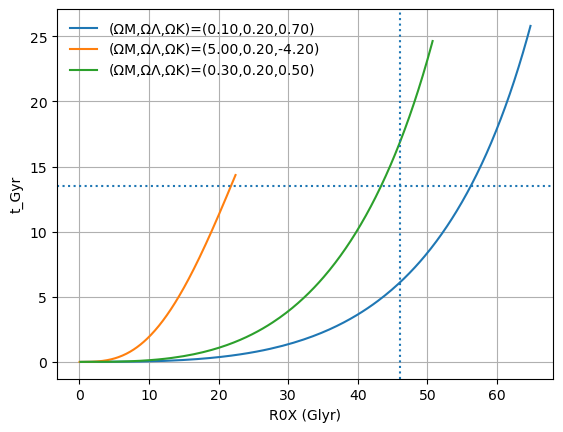

In [27]:
om_arr = (0.1,5,0.3)  # Matter
ol = 0.2  # Lambda

a_arr = np.arange(0.00001,2,0.01)

def adot_a_inv(a,om,ol,ok):                         # 1/(adot *a)   the integrand of EQN 23   
    adot_a_inv = (a**2)*(np.sqrt((om * a**(-3)) + (ok * a**(-2)) + ol)) 
    return 1.0/adot_a_inv

def adot(a,om,ol,ok):                         # 1/(adot)   the integrand of EQN 24  
    adot = (a)*(np.sqrt((om * a**(-3)) + (ok * a**(-2)) + ol))  
    return 1.0/adot
    

for om in om_arr:
    ok = 1-om-ol  # curvature
    R0X = []    # Define an empty list to store age_Gyr values
    for a in a_arr:
        xx = integrate.quad(adot_a_inv, 0, a, args=(om,ol,ok))  # RHS = RHS of EQN (8)* H_0   Note: integral limits in green, they are between what values of a you want to know the time for
        R0X.append(xx[0] * cH0Glyr)
     

    t_Gyr = []    # Define an empty list to store t_Gyr values - this is the age at a in a_arr
    for a in a_arr:
        yy = integrate.quad(adot, 0, a, args=(om,ol,ok))  # RHS = RHS of EQN (8)* H_0   Note: integral limits in green, they are between what values of a you want to know the time for
        t_Gyr.append(yy[0] / H0y)
        

    plt.plot(R0X,t_Gyr,label='(ΩM,ΩΛ,ΩK)=(%.2f,%.2f,%.2f)'%(om,ol,ok))
    
plt.axvline(x=46,linestyle=':') # Plot some crosshairs 
plt.axhline(y=13.47,linestyle=':')
plt.xlabel('R0X (Glyr)')
plt.ylabel('t_Gyr')
plt.legend(loc='upper left', frameon=False)
plt.grid(True)
plt.show()

## trying to correctly scale a right hand side y-axis scale for a, universe expansion on the right side

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


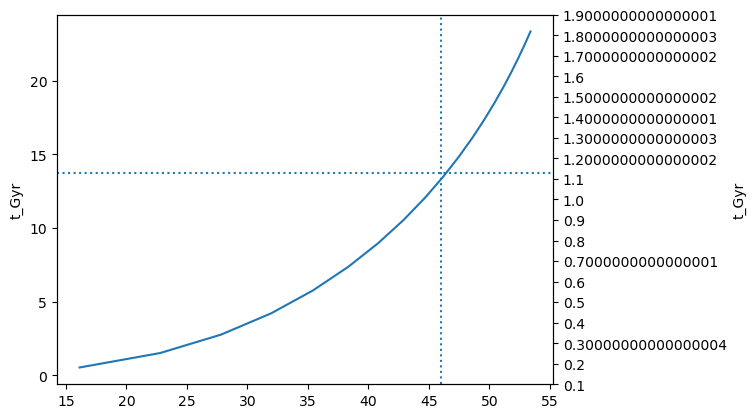

In [34]:
om = 0.3  # Matter
ol = 0.7  # Lambda
ok = 1-om-ol  # curvature
a_arr = np.arange(0.1,2,0.1)

def adot_a_inv(a,om,ol,ok):                         # 1/(adot *a)   the integrand of EQN 23   
    adot_a_inv = (a**2)*(np.sqrt((om * a**(-3)) + (ok * a**(-2)) + ol)) 
    return 1.0/adot_a_inv

R0X = []    # Define an empty list to store age_Gyr values
for a in a_arr:
    xx = integrate.quad(adot_a_inv, 0, a, args=(om,ol,ok))  # RHS = RHS of EQN (8)* H_0   Note: integral limits in green, they are between what values of a you want to know the time for
    R0X.append(xx[0] * cH0Glyr)


def adot(a,om,ol,ok):                         # 1/(adot)   the integrand of EQN 24  
    adot = (a)*(np.sqrt((om * a**(-3)) + (ok * a**(-2)) + ol))  
    return 1.0/adot

t_Gyr = []    # Define an empty list to store t_Gyr values - this is the age at a in a_arr
for a in a_arr:
    yy = integrate.quad(adot, 0, a, args=(om,ol,ok))  # RHS = RHS of EQN (8)* H_0   Note: integral limits in green, they are between what values of a you want to know the time for
    t_Gyr.append(yy[0] / H0y)


fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(R0X,t_Gyr, label='(ΩM,ΩΛ,ΩK)=(%.2f,%.2f,%.2f)' % (om, ol, ok))
ax1.axvline(x=46, linestyle=':') 
ax1.axhline(y=13.7, linestyle=':')

# Set the label for the left y-axis
ax1.set_ylabel('t_Gyr')

# Set the tick labels for the right y-axis to be the corresponding values of a_arr
ax2.set_yticks(np.arange(len(a_arr)))
ax2.set_yticklabels(a_arr)

# Set the label for the right y-axis
ax2.set_ylabel('Scale factor a')

plt.ylabel('t_Gyr')
plt.legend(loc='lower right',frameon=False)
plt.show()